# SEP 740 Deep Learning Project 

Members:
* **Prathamesh Joshi**
* **Amruta Koshe**
* **Nidhi Vanjare**

#### This project is performed under the Guidance of Professor: Hamidreza


> All the comments in the project are added by us, to provide an indepth experience in learning the subject

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
import tensorflow as tf
import tensorflow_hub as hub

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Activation, Dense, MaxPool2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"amrutakoshe","key":"3b30e4d7a1259fd36a0643cee21bc292"}'}

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle

In [7]:
!kaggle datasets download -d jessicali9530/celeba-dataset

celeba-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!mkdir celeba-dataset

mkdir: cannot create directory ‘celeba-dataset’: File exists


In [10]:
!unzip celeba-dataset.zip -d celeba-dataset

Streaming output truncated to the last 5000 lines.
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba-dataset/img_align_celeba/img_

In [11]:
df_list_attr = pd.read_csv('/content/celeba-dataset/list_attr_celeba.csv')
df_list_attr.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


# Data Preprocessing and Data Visualization

In [12]:
df_list_attr.set_index('image_id', inplace = True) # Setting 'image_id' column as Index
df_list_attr.replace(to_replace = -1, value = 0,inplace = True ) # Replacing '-1' values for '0', indicating the absence of attributes in the image
df_list_attr.head(10) 

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
000006.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
000007.jpg,1,0,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
000008.jpg,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
000009.jpg,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [13]:
df_list_attr.corr() # to see how our features are correlated.

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
5_o_Clock_Shadow,1.000000,-0.158587,-0.062415,0.168488,0.005584,-0.089243,-0.043699,0.152010,1.006038e-01,-0.132686,...,0.259370,-0.067777,0.052260,-0.124250,-0.161911,0.033997,-0.333921,-0.116239,0.097899,0.014869
Arched_Eyebrows,-0.158587,1.000000,0.250599,-0.091947,-0.069524,-0.027775,0.243400,-0.084025,-9.959764e-04,0.127009,...,-0.116001,0.093834,-0.054486,0.200835,0.294779,-0.099980,0.460409,0.220184,-0.132821,0.146798
Attractive,-0.062415,0.250599,1.000000,-0.178464,-0.145826,0.059712,0.062552,-0.277064,4.139890e-03,0.154774,...,-0.100229,0.147845,0.041550,0.214992,0.124349,-0.138636,0.480104,0.068738,-0.156420,0.387735
Bags_Under_Eyes,0.168488,-0.091947,-0.178464,1.000000,0.116215,-0.057568,-0.005982,0.361604,2.667485e-03,-0.106879,...,0.100411,0.112759,0.024208,-0.127128,-0.096969,-0.005726,-0.284052,-0.052964,0.196980,-0.230759
Bald,0.005584,-0.069524,-0.145826,0.116215,1.000000,-0.064044,-0.003577,0.180148,-8.036419e-02,-0.063056,...,0.058599,0.009402,-0.071920,-0.103482,-0.061211,-0.030625,-0.142852,-0.050445,0.176501,-0.196253
Bangs,-0.089243,-0.027775,0.059712,-0.057568,-0.064044,1.000000,0.034876,-0.069395,-3.355778e-02,0.098854,...,-0.073341,0.052469,0.020034,0.068166,0.058203,-0.079939,0.163378,0.114454,-0.092919,0.017695
Big_Lips,-0.043699,0.243400,0.062552,-0.005982,-0.003577,0.034876,1.000000,0.076814,6.719131e-02,0.023674,...,-0.039739,0.012885,-0.037144,0.120190,0.126523,-0.013286,0.195212,0.149892,-0.067770,0.107722
Big_Nose,0.152010,-0.084025,-0.277064,0.361604,0.180148,-0.069395,0.076814,1.000000,8.109064e-02,-0.158323,...,0.131667,0.100888,-0.028837,-0.131843,-0.058029,0.065552,-0.303651,-0.035930,0.205014,-0.284382
Black_Hair,0.100604,-0.000996,0.004140,0.002667,-0.080364,-0.033558,0.067191,0.081091,1.000000e+00,-0.233626,...,0.043231,-0.002533,0.112496,-0.085227,0.002348,-0.103605,-0.066856,-0.042539,0.023184,0.121372
Blond_Hair,-0.132686,0.127009,0.154774,-0.106879,-0.063056,0.098854,0.023674,-0.158323,-2.336262e-01,1.000000,...,-0.096039,0.090209,0.005458,0.128400,0.095005,-0.083373,0.281935,0.143577,-0.106377,0.052402


In [14]:
attr_names = []
attr_names = list(df_list_attr.columns)
print(attr_names)

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [15]:
# we make a function to visualize the distribution of each attribute present in a particular image.

def plot_attr(attr_names):
    fig_plot = plt.figure(figsize=(20, 15))
    for i, attr_name in enumerate(attr_names):
        fig_plot.add_subplot(4, 10, i+1)
        col = df_list_attr[attr_name]
        g = sns.barplot(x=col.value_counts().index, y=col.value_counts(normalize=True))
        g.set(ylim=(0, 1))
        plt.yticks([])
    plt.show()

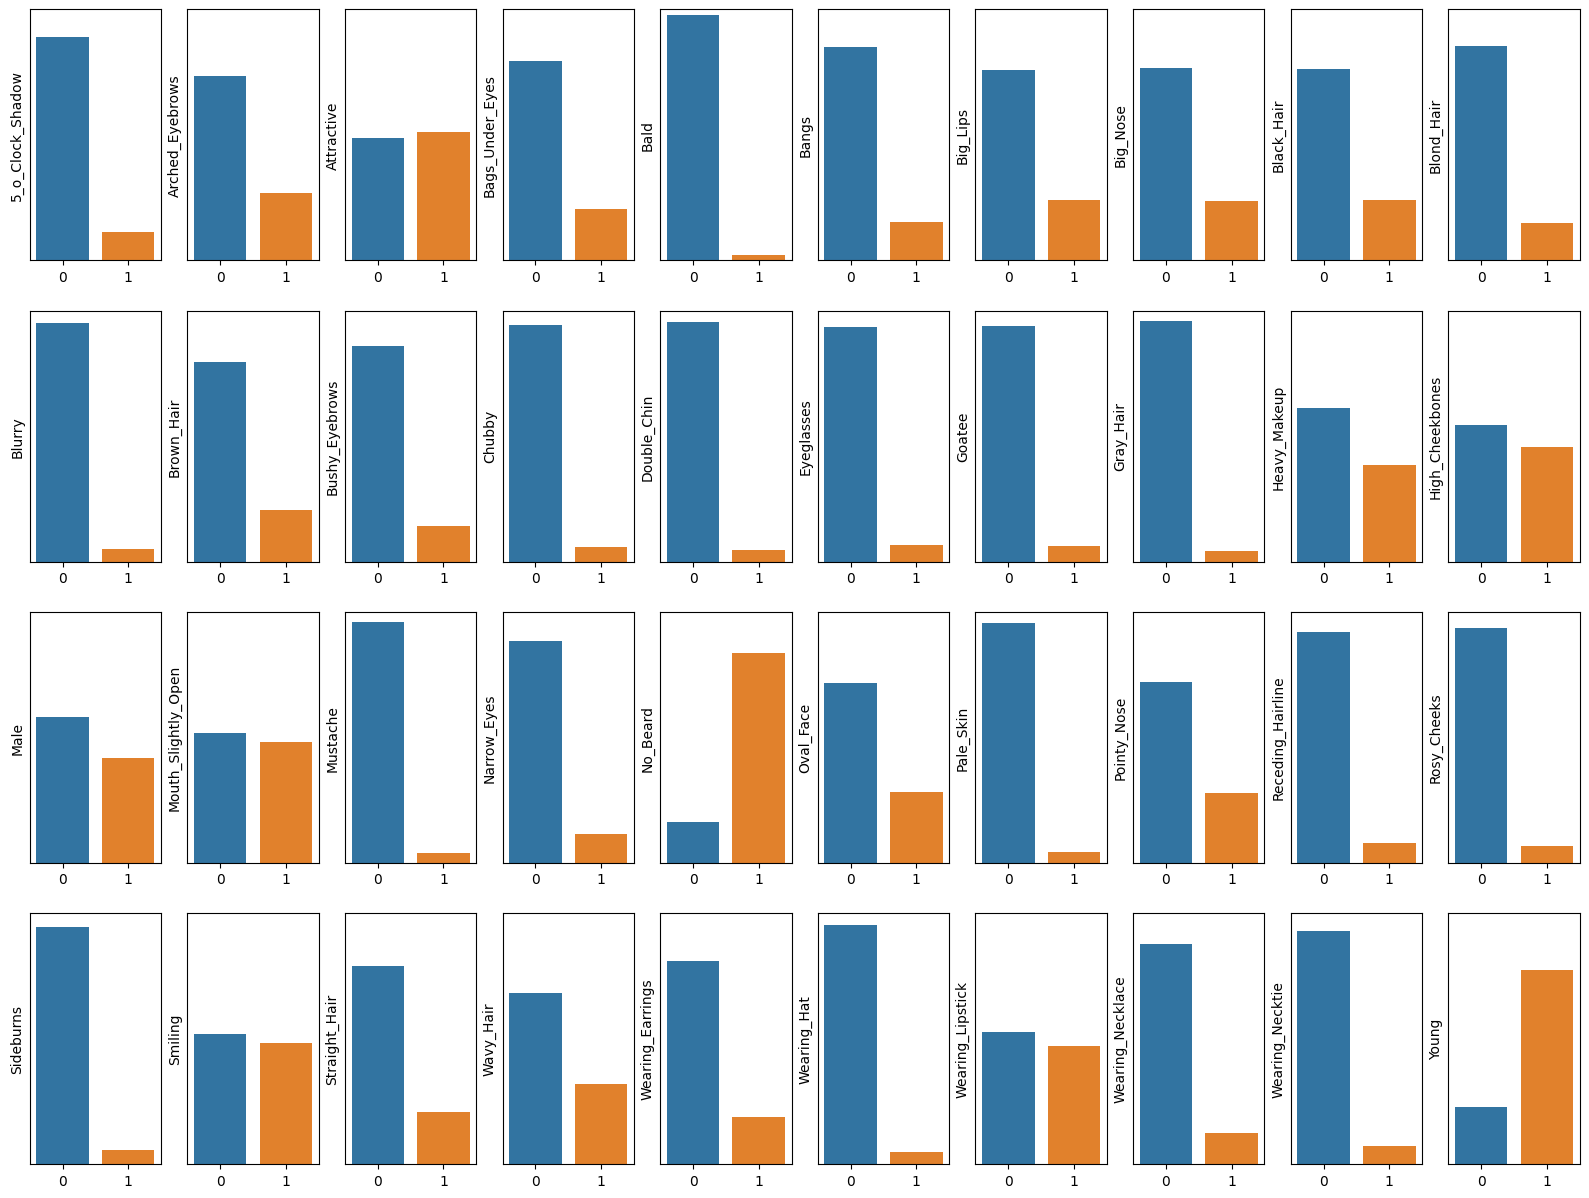

In [16]:
plot_attr(attr_names)

In [17]:
# we try to visualize the correlation in a interractive way using plotly.

import plotly.express as py
import plotly.graph_objects as go

fig = go.Figure()

fig = py.imshow(df_list_attr.corr())
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)
fig.show()

In [18]:
df_eval_partition = pd.read_csv('/content/celeba-dataset/list_eval_partition.csv')
df_eval_partition.partition.value_counts()

0    162770
2     19962
1     19867
Name: partition, dtype: int64

In [19]:
df_eval_partition.head(5)

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


#### According to dataset information 
* 0 - No of Training images
* 1 - No of Validation Images
* 2 - No of Testing Images
>  So basically the dataset is roughly divided into 80%, 10% and 10% respectively

#### Visualizing dataset images along with associated Attributes

In [20]:
attr2idx = {v:i for i, v in enumerate(attr_names)}
attr2idx

{'5_o_Clock_Shadow': 0,
 'Arched_Eyebrows': 1,
 'Attractive': 2,
 'Bags_Under_Eyes': 3,
 'Bald': 4,
 'Bangs': 5,
 'Big_Lips': 6,
 'Big_Nose': 7,
 'Black_Hair': 8,
 'Blond_Hair': 9,
 'Blurry': 10,
 'Brown_Hair': 11,
 'Bushy_Eyebrows': 12,
 'Chubby': 13,
 'Double_Chin': 14,
 'Eyeglasses': 15,
 'Goatee': 16,
 'Gray_Hair': 17,
 'Heavy_Makeup': 18,
 'High_Cheekbones': 19,
 'Male': 20,
 'Mouth_Slightly_Open': 21,
 'Mustache': 22,
 'Narrow_Eyes': 23,
 'No_Beard': 24,
 'Oval_Face': 25,
 'Pale_Skin': 26,
 'Pointy_Nose': 27,
 'Receding_Hairline': 28,
 'Rosy_Cheeks': 29,
 'Sideburns': 30,
 'Smiling': 31,
 'Straight_Hair': 32,
 'Wavy_Hair': 33,
 'Wearing_Earrings': 34,
 'Wearing_Hat': 35,
 'Wearing_Lipstick': 36,
 'Wearing_Necklace': 37,
 'Wearing_Necktie': 38,
 'Young': 39}

In [21]:
import cv2

In [22]:
df_eval_partition.set_index('image_id', inplace=True)

In [23]:
df_model = df_eval_partition.join(df_list_attr, how='inner')
df_model.reset_index(inplace=True)

In [24]:
df_model.head()

,image_id,partition,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,0,1,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [25]:
BATCH_SIZE = 128
IMG_WIDTH = 228
IMG_HEIGHT = 228
NUM_EPOCHS = 50

In [26]:
def generator(samples, batch_size=BATCH_SIZE, 
              shuffle_data=True,IMG_WIDTH=IMG_WIDTH, IMG_HEIGHT=IMG_HEIGHT,
              model_preprocessor=None):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        samples = df_model.sample(frac = 1)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples.iloc[offset:offset+batch_size, :]

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []

            # For each example
            for i in batch_samples.index:
                # Load image (X) and label (y)
                # print("now inedex : ", i)
                img_name = batch_samples["image_id"][i]
                label = list(np.array(batch_samples[batch_samples.index==i].iloc[:, 2:])[0])
                
                img =  cv2.imread('/content/celeba-dataset/img_align_celeba/img_align_celeba/'+img_name)
                
                # apply any kind of preprocessing
                img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
                # Add example to arrays
                if model_preprocessor:
                  img = model_preprocessor(img)
                X_train.append(img)
                y_train.append(label)

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [27]:
training_data = df_model.loc[df_model["partition"] == 0]
validation_data = df_model.loc[df_model["partition"] == 1]
testing_data = df_model.loc[df_model["partition"] == 2]

In [28]:
training_data.head()

,image_id,partition,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,0,1,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
training_g = generator(training_data)
validation_g = generator(validation_data)
testing_g = generator(testing_data)

In [30]:
pip install keras.applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from keras.applications import ResNet50
from keras.models import Model
import keras

In [32]:
def resnet50_model(num_features):
  base = ResNet50(include_top=False, weights=None, input_shape=(228,228,3))

  for layer in base.layers[:30]:
    layer.trainable = False


  x = base.layers[-1].output
  
  x = Dense(512, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.3)(x)
  x = keras.layers.Flatten()(x)
  top = Dense(num_features, activation='sigmoid')(x)

  return Model(inputs=base.input, outputs=top)

In [33]:
with tf.device(device_name):  
  model = resnet50_model(num_features=40)
  model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics="binary_accuracy")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 228, 228, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 234, 234, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [34]:
early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy", # metrics to monitor
        patience=3, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True)

In [35]:
history = model.fit(training_g, validation_data = validation_g, steps_per_epoch= training_data.shape[0]//BATCH_SIZE//10, 
                    validation_steps = validation_data.shape[0] // BATCH_SIZE, epochs= 20, callbacks=early_stopping, verbose=1) 

Epoch 1/20
127/127 [==============================] - 327s 2s/step - loss: 0.5359 - binary_accuracy: 0.8276 - val_loss: 2.6959 - val_binary_accuracy: 0.6498
Epoch 2/20
127/127 [==============================] - 237s 2s/step - loss: 0.4042 - binary_accuracy: 0.8605 - val_loss: 68.7389 - val_binary_accuracy: 0.7667
Epoch 3/20
127/127 [==============================] - 237s 2s/step - loss: 0.3412 - binary_accuracy: 0.8716 - val_loss: 35.9924 - val_binary_accuracy: 0.8372
Epoch 4/20
127/127 [==============================] - 251s 2s/step - loss: 0.3121 - binary_accuracy: 0.8787 - val_loss: 0.4274 - val_binary_accuracy: 0.8776
Epoch 5/20
127/127 [==============================] - 237s 2s/step - loss: 0.2878 - binary_accuracy: 0.8842 - val_loss: 0.2661 - val_binary_accuracy: 0.8826
Epoch 6/20
127/127 [==============================] - 251s 2s/step - loss: 0.2884 - binary_accuracy: 0.8812 - val_loss: 0.9670 - val_binary_accuracy: 0.7986
Epoch 7/20
127/127 [==============================] - 25

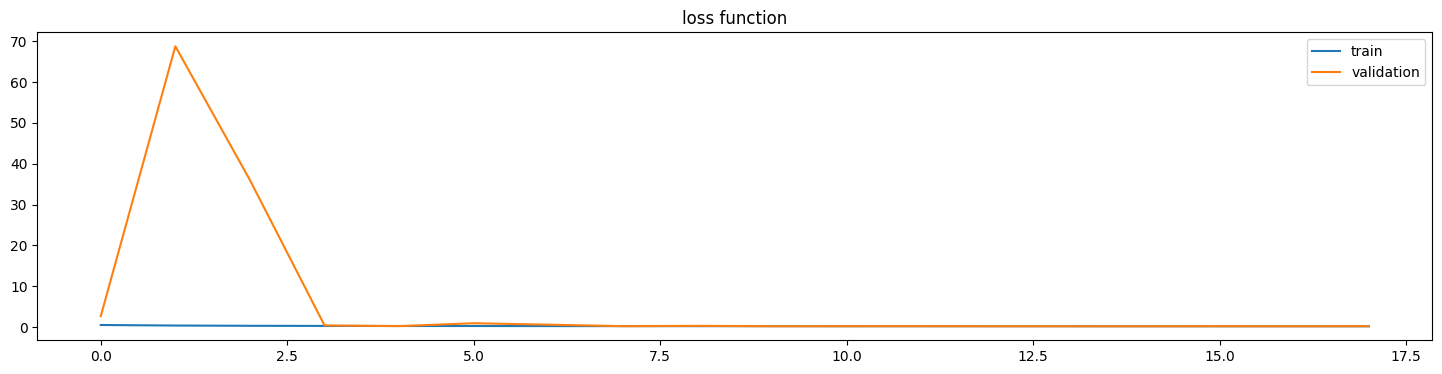

In [36]:
plt.figure(figsize=(18,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('loss function')
plt.show()

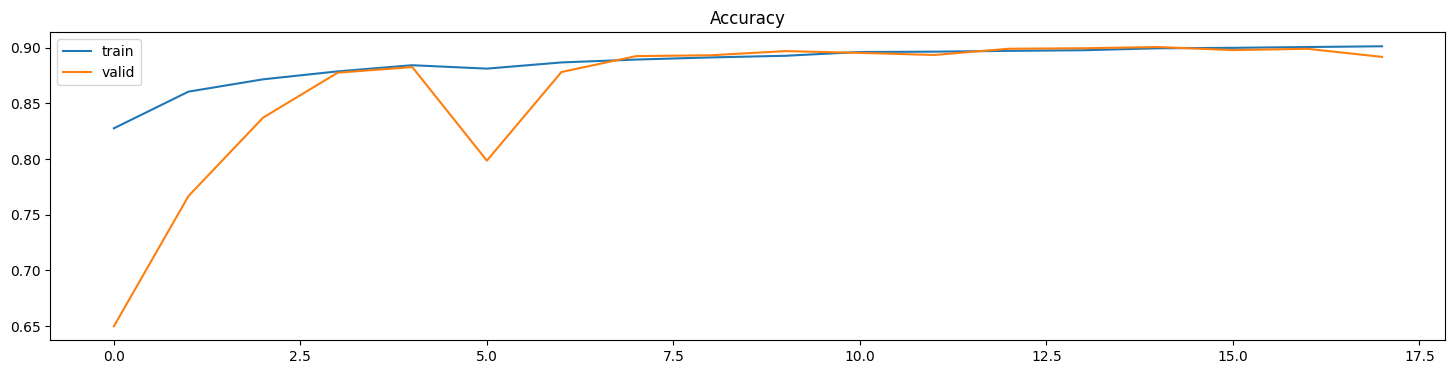

In [37]:
# Plot accuracy through epochs
plt.figure(figsize=(18, 4))
plt.plot(history.history['binary_accuracy'], label = 'train')
plt.plot(history.history['val_binary_accuracy'], label = 'valid')
plt.legend()
plt.title('Accuracy')
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
prediction_list = []
real_values = []
for i in range(len(testing_data)//BATCH_SIZE):
  images, labels = next(testing_g)
  
  # for img, lab in zip(images, labels):
  for pred, true in zip(model.predict(images), labels):
    prediction_list.append(pred)
    real_values.append(true)
##############################
prediction_list = pd.DataFrame(prediction_list)
prediction_list.columns = list(df_model.head().columns)[2:]
real_values = pd.DataFrame(real_values)
real_values.columns = list(df_model.head().columns)[2:]

4/4 [==============================] - 0s 99ms/step


In [40]:
for col in prediction_list.columns:
  for index in range(len(prediction_list)):
      if prediction_list[col][index] >= 0.5:
        prediction_list[col][index] = int(1)
      else:
        prediction_list[col][index] = int(0)
prediction_list = prediction_list.astype(int)

accuracies = {}
for col in prediction_list.columns:
  y_true = list(real_values[col])
  y_pred = list(prediction_list[col])
  acc = accuracy_score(y_true, y_pred)
  accuracies[col] = acc
  print("accuracy of "+col+" is : "+str(acc))
print("**** OVERALL ACCURACY: ", sum(list(accuracies.values()))/len(list(accuracies.values())))

accuracy of 5_o_Clock_Shadow is : 0.9223286290322581
accuracy of Arched_Eyebrows is : 0.8135584677419355
accuracy of Attractive is : 0.8012600806451613
accuracy of Bags_Under_Eyes is : 0.8336693548387096
accuracy of Bald is : 0.9847782258064516
accuracy of Bangs is : 0.9415322580645161
accuracy of Big_Lips is : 0.7790322580645161
accuracy of Big_Nose is : 0.8178427419354839
accuracy of Black_Hair is : 0.8732358870967742
accuracy of Blond_Hair is : 0.9475302419354839
accuracy of Blurry is : 0.9509576612903226
accuracy of Brown_Hair is : 0.85
accuracy of Bushy_Eyebrows is : 0.9024193548387097
accuracy of Chubby is : 0.950453629032258
accuracy of Double_Chin is : 0.959929435483871
accuracy of Eyeglasses is : 0.9907258064516129
accuracy of Goatee is : 0.9647177419354839
accuracy of Gray_Hair is : 0.9709677419354839
accuracy of Heavy_Makeup is : 0.9129536290322581
accuracy of High_Cheekbones is : 0.8626008064516129
accuracy of Male is : 0.9654737903225806
accuracy of Mouth_Slightly_Open is 

In [41]:
start = "\033[1m"
end = "\033[0;0m"

In [42]:
images_path = "/content/celeba-dataset/img_align_celeba/img_align_celeba/"

1/1 [==============================] - 1s 1s/step


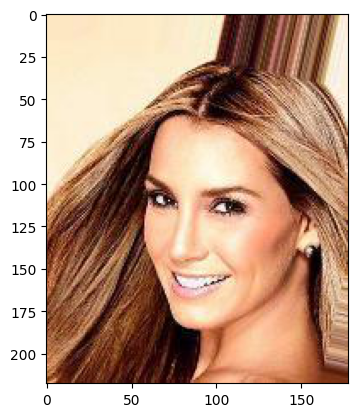

5_o_Clock_Shadow True: 0 Predicted: 0
Arched_Eyebrows True: 1 Predicted: 0
Attractive True: 1 Predicted: 0
Bags_Under_Eyes True: 0 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 0 Predicted: 0
Big_Lips True: 0 Predicted: 0
Big_Nose True: 0 Predicted: 0
Black_Hair True: 0 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 0 Predicted: 0
Brown_Hair True: 1 Predicted: 0
Bushy_Eyebrows True: 0 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 1 Predicted: 0
High_Cheekbones True: 1 Predicted: 0
Male True: 0 Predicted: 1
Mouth_Slightly_Open True: 1 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 0 Predicted: 0
No_Beard True: 1 Predicted: 1
Oval_Face True: 0 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 1 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 0 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

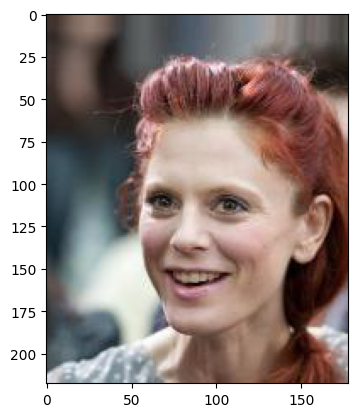

5_o_Clock_Shadow True: 0 Predicted: 0
Arched_Eyebrows True: 0 Predicted: 0
Attractive True: 0 Predicted: 0
Bags_Under_Eyes True: 1 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 0 Predicted: 0
Big_Lips True: 0 Predicted: 0
Big_Nose True: 1 Predicted: 0
Black_Hair True: 0 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 0 Predicted: 0
Brown_Hair True: 1 Predicted: 0
Bushy_Eyebrows True: 0 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 0 Predicted: 0
High_Cheekbones True: 1 Predicted: 0
Male True: 0 Predicted: 0
Mouth_Slightly_Open True: 1 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 0 Predicted: 0
No_Beard True: 1 Predicted: 1
Oval_Face True: 0 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 0 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 0 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

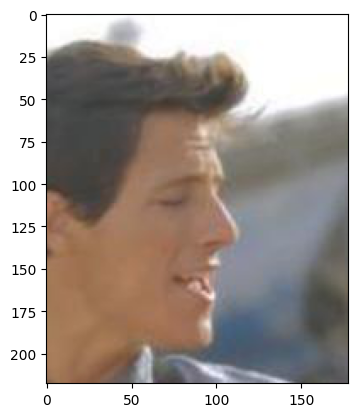

5_o_Clock_Shadow True: 0 Predicted: 0
Arched_Eyebrows True: 0 Predicted: 0
Attractive True: 0 Predicted: 0
Bags_Under_Eyes True: 0 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 0 Predicted: 0
Big_Lips True: 1 Predicted: 0
Big_Nose True: 0 Predicted: 0
Black_Hair True: 0 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 1 Predicted: 0
Brown_Hair True: 0 Predicted: 0
Bushy_Eyebrows True: 0 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 0 Predicted: 0
High_Cheekbones True: 0 Predicted: 0
Male True: 1 Predicted: 1
Mouth_Slightly_Open True: 0 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 1 Predicted: 0
No_Beard True: 1 Predicted: 1
Oval_Face True: 0 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 1 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 0 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

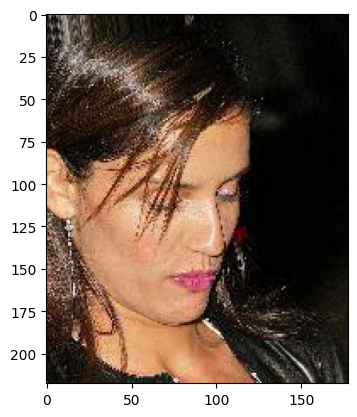

5_o_Clock_Shadow True: 0 Predicted: 0
Arched_Eyebrows True: 0 Predicted: 0
Attractive True: 1 Predicted: 0
Bags_Under_Eyes True: 0 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 0 Predicted: 0
Big_Lips True: 0 Predicted: 0
Big_Nose True: 0 Predicted: 0
Black_Hair True: 0 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 0 Predicted: 0
Brown_Hair True: 0 Predicted: 0
Bushy_Eyebrows True: 0 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 0 Predicted: 0
High_Cheekbones True: 0 Predicted: 0
Male True: 0 Predicted: 1
Mouth_Slightly_Open True: 0 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 0 Predicted: 0
No_Beard True: 1 Predicted: 1
Oval_Face True: 0 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 1 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 0 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

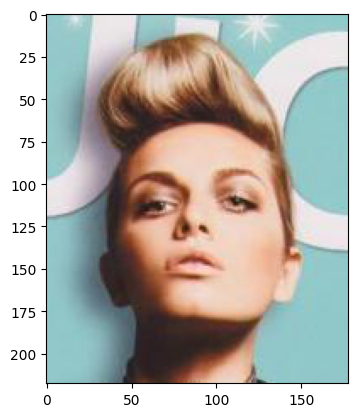

5_o_Clock_Shadow True: 0 Predicted: 0
Arched_Eyebrows True: 1 Predicted: 0
Attractive True: 1 Predicted: 0
Bags_Under_Eyes True: 0 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 0 Predicted: 0
Big_Lips True: 1 Predicted: 0
Big_Nose True: 0 Predicted: 0
Black_Hair True: 0 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 0 Predicted: 0
Brown_Hair True: 0 Predicted: 0
Bushy_Eyebrows True: 0 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 1 Predicted: 0
High_Cheekbones True: 0 Predicted: 0
Male True: 0 Predicted: 1
Mouth_Slightly_Open True: 0 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 1 Predicted: 0
No_Beard True: 1 Predicted: 0
Oval_Face True: 0 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 1 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 0 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

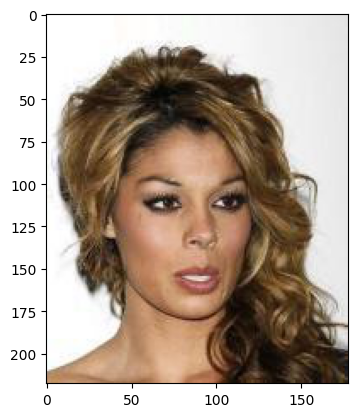

5_o_Clock_Shadow True: 0 Predicted: 0
Arched_Eyebrows True: 1 Predicted: 0
Attractive True: 1 Predicted: 0
Bags_Under_Eyes True: 0 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 0 Predicted: 0
Big_Lips True: 1 Predicted: 0
Big_Nose True: 0 Predicted: 0
Black_Hair True: 0 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 0 Predicted: 0
Brown_Hair True: 1 Predicted: 0
Bushy_Eyebrows True: 0 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 1 Predicted: 0
High_Cheekbones True: 0 Predicted: 0
Male True: 0 Predicted: 1
Mouth_Slightly_Open True: 1 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 0 Predicted: 0
No_Beard True: 1 Predicted: 1
Oval_Face True: 0 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 0 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 0 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

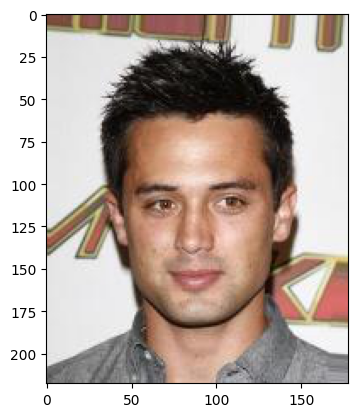

5_o_Clock_Shadow True: 1 Predicted: 0
Arched_Eyebrows True: 0 Predicted: 0
Attractive True: 1 Predicted: 0
Bags_Under_Eyes True: 1 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 0 Predicted: 0
Big_Lips True: 1 Predicted: 0
Big_Nose True: 1 Predicted: 0
Black_Hair True: 1 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 0 Predicted: 0
Brown_Hair True: 0 Predicted: 0
Bushy_Eyebrows True: 1 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 0 Predicted: 0
High_Cheekbones True: 0 Predicted: 0
Male True: 1 Predicted: 1
Mouth_Slightly_Open True: 0 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 0 Predicted: 0
No_Beard True: 1 Predicted: 0
Oval_Face True: 0 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 1 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 0 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

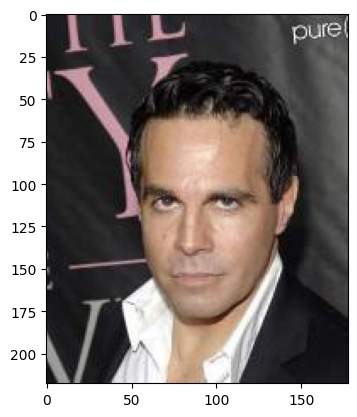

5_o_Clock_Shadow True: 1 Predicted: 0
Arched_Eyebrows True: 1 Predicted: 0
Attractive True: 0 Predicted: 0
Bags_Under_Eyes True: 1 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 0 Predicted: 0
Big_Lips True: 1 Predicted: 0
Big_Nose True: 0 Predicted: 0
Black_Hair True: 1 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 0 Predicted: 0
Brown_Hair True: 0 Predicted: 0
Bushy_Eyebrows True: 0 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 0 Predicted: 0
High_Cheekbones True: 0 Predicted: 0
Male True: 1 Predicted: 1
Mouth_Slightly_Open True: 0 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 0 Predicted: 0
No_Beard True: 1 Predicted: 0
Oval_Face True: 0 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 1 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 0 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

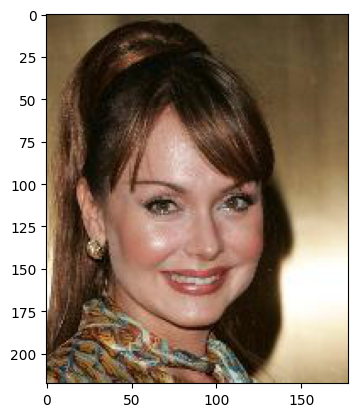

5_o_Clock_Shadow True: 0 Predicted: 0
Arched_Eyebrows True: 1 Predicted: 0
Attractive True: 1 Predicted: 0
Bags_Under_Eyes True: 0 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 1 Predicted: 0
Big_Lips True: 1 Predicted: 0
Big_Nose True: 0 Predicted: 0
Black_Hair True: 0 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 0 Predicted: 0
Brown_Hair True: 0 Predicted: 0
Bushy_Eyebrows True: 0 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 1 Predicted: 0
High_Cheekbones True: 1 Predicted: 0
Male True: 0 Predicted: 1
Mouth_Slightly_Open True: 1 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 0 Predicted: 0
No_Beard True: 1 Predicted: 1
Oval_Face True: 1 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 1 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 1 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

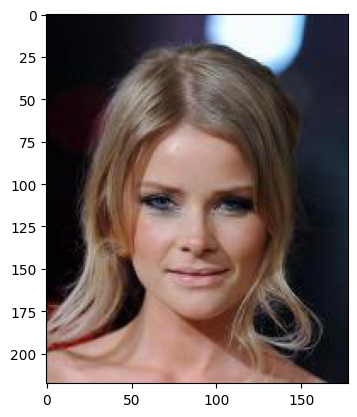

5_o_Clock_Shadow True: 0 Predicted: 0
Arched_Eyebrows True: 0 Predicted: 0
Attractive True: 1 Predicted: 0
Bags_Under_Eyes True: 0 Predicted: 0
Bald True: 0 Predicted: 0
Bangs True: 0 Predicted: 0
Big_Lips True: 0 Predicted: 0
Big_Nose True: 0 Predicted: 0
Black_Hair True: 0 Predicted: 0
Blond_Hair True: 0 Predicted: 0
Blurry True: 0 Predicted: 0
Brown_Hair True: 0 Predicted: 0
Bushy_Eyebrows True: 0 Predicted: 0
Chubby True: 0 Predicted: 0
Double_Chin True: 0 Predicted: 0
Eyeglasses True: 0 Predicted: 0
Goatee True: 0 Predicted: 0
Gray_Hair True: 0 Predicted: 0
Heavy_Makeup True: 1 Predicted: 0
High_Cheekbones True: 1 Predicted: 0
Male True: 0 Predicted: 1
Mouth_Slightly_Open True: 0 Predicted: 0
Mustache True: 0 Predicted: 0
Narrow_Eyes True: 0 Predicted: 0
No_Beard True: 1 Predicted: 1
Oval_Face True: 0 Predicted: 0
Pale_Skin True: 0 Predicted: 0
Pointy_Nose True: 0 Predicted: 0
Receding_Hairline True: 0 Predicted: 0
Rosy_Cheeks True: 0 Predicted: 0
Sideburns True: 0 Predicted: 0
Sm

In [43]:
from tensorflow.keras.utils import img_to_array, load_img, array_to_img
for img_index in range(10):
  original_img = load_img(images_path + df_model["image_id"][img_index])
  real_values = []
  for col in df_model.columns[2:]:
    real_values.append(df_model[col][img_index])
  img = img_to_array(original_img)
  img = cv2.resize(img,(228,228))
  predictions = model.predict(np.array([img]))
  predictions = list(predictions[0])
  plt.imshow(original_img)
  plt.show()

  for true, pred , col in zip(real_values, predictions, df_model.columns[2:]):
    pred = 1 if pred >=0.5 else 0
    if pred==true:
      print("\033[1;32m"+start+col+" True: "+str(true)+ " Predicted: "+str(pred)+end)
    else:
      print("\033[1;31m"+start+col+" True: "+str(true)+ " Predicted: "+str(pred)+end)

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
model.save('/content/drive/MyDrive/Colab Notebooks/Model/ams-resnet50_model_20epochs_freezefirst30.h5')